In [1]:
import numpy as np
import scipy

In [2]:
M_1 = lambda s,rho: 2**s / (1-2**(-s)) * rho
M_2 = lambda s,rho: (2**s * (2*rho+rho**2)) / (1-2**(-s) - 2**s * (2*rho+rho**2))
M_3 = lambda s,rho: (2**s * rho) / ((1-2**(-s)) * (1-rho) - 2**s * rho)

In [3]:
Linv_norm = lambda gamma,s,rho: gamma**2 * (1+M_1(2*s-1,rho)) * (1+M_2(2*s-2,rho)) * (1+M_3(s,rho))

In [4]:
K_r = lambda r: (3-2**(-r)) * 2**r / (1-2**(-r))**2

def K_CM_rs(r, s):
    K = 2 / (1.0-2**(-r)) / (1.0-2**(-s)) / (1.0-2**(-s-r)) * 2**(r+2*s)
    K += (3+2**(-r)) / (1-2**(-r))**2 * 2**(2*r+s)
    return K

In [5]:
def R_1(s, rho):
    R = K_CM_rs(s-1, s) * (2*K_r(s-1)*rho+8) / (1-M_1(2*s-1,rho))
    R = R * rho**3 / (1 - K_r(s-1)*rho)
    return R

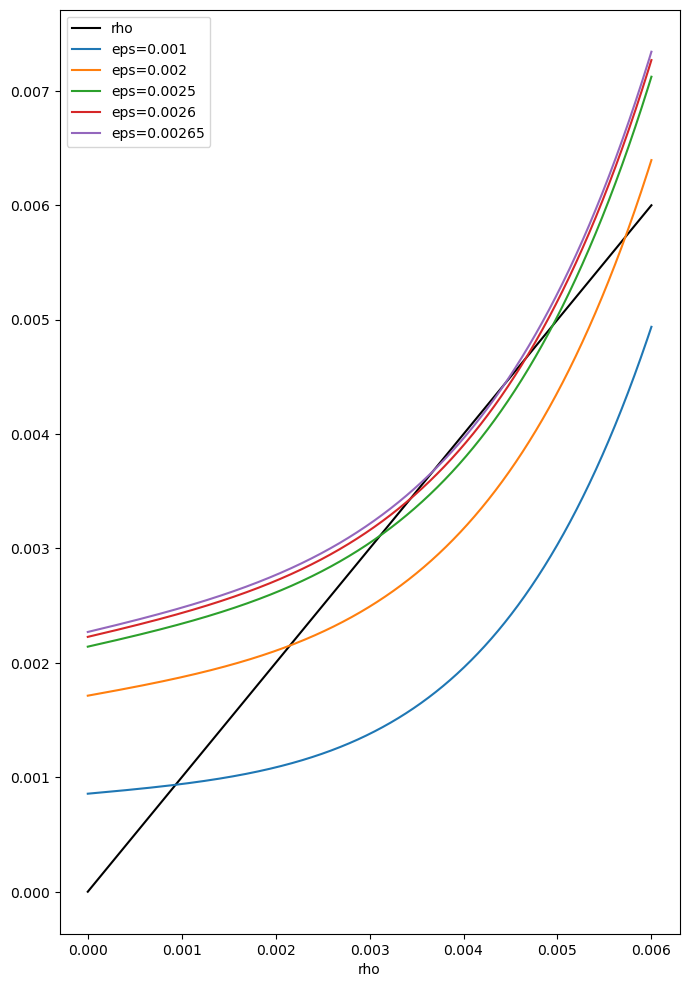

In [30]:
gamma = (3+np.sqrt(5))/8
s = 3.1
eps_list = [0.001, 0.002, 0.0025, 0.0026, 0.00265]
rho_max = 0.006
rho_vals = np.linspace(0, rho_max, 10001)

plt.figure(figsize=(8,12))
plt.plot(rho_vals, rho_vals, 'k-', label='rho')
for eps in eps_list:
    res_vals = Linv_norm(gamma, s, rho_vals) * (R_1(s, rho_vals) + 2*eps)
    plt.plot(rho_vals, res_vals, label=f'eps={eps}')
plt.xlabel('rho')
plt.legend()
plt.show()

In [10]:
K_r(2.1)

20.175921939427305

In [47]:
gamma**2

np.float64(0.4283813728906053)